# Workflow

This task is mostly about the Data Science leading up to the Machine Learning. Meaning there is no machine learning, but rather just gathering insight from the data.

The workflow I've chosen to follow for this task is:
- The "What"/ what do we want to predict
- Acquire data
- My hypothesis
- Data preprocessing
- Data Analysis

### The "What"
Predict/ Classify whether or not a person would survive the Titanic. This would be the end goal, but in this task I never get to this point of actually creating a model.

### Acquire data
For this task I've chosen to use the Kaggle Titanic dataset. Good explanation of the data: https://www.kaggle.com/competitions/titanic/data

### My hypothesis
My hypothesis for this dataset is that gender, ticket class and age will have the biggest impact on someone's chance of survival

### Data preprocessing
This part is all about getting to know and fixing the data. This often consist of handling missing value, normalizing real values, encoding categorical data, etc.

### Data Analysis
When doing the data analysis our goal is to extract insight and correlations from the data by using a combination of statistics and visual representations

In [326]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [298]:
# Load dataset
df = pd.read_csv('titanic.csv')

## Data preprocessing

In [299]:
df.shape

(891, 12)

In [300]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [302]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [303]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Cleaning the dataset

In [305]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Feature selection

- Removing PassengerId due to it holding no meaningful data for visualizing or ML
- Removing name for the same reason
- Ticket consists of the ticket number which probably have no correlation with survival
- Cabin has way to many null-values to give us any meaningful info and therefor I removed it

In [306]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### Null-values

In [307]:
# To find which place most people embarked from to set this as the embarked for Null values
max = df.groupby('Embarked').count()
# print(max)

def handle_null(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    return  df

# Function to drop all rows with at least 1 null value
def null_values_drop(df):
    df_copy = df.copy()
    df_drop = df_copy.dropna(axis=0, how='any')

    return df_drop

df = handle_null(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [308]:
# Check the new sum of nulls
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [309]:
# Encoding Sex to be represented by either ones or zeroes
df['Sex'] = df['Sex'].replace(['female', 'male'], [0,1])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [310]:
# Typecasting categorical values

df['Sex'] =  df['Sex'].astype('category')
df['Pclass'] =  df['Pclass'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 43.9+ KB


### Normalizing

In [311]:
# NEED TO: BIN FARE AND AGE

def bins(df):
    pass

def min_max_normalizing(df):
    df_copy = df.copy()

    # df_copy['Age'] = (df_copy['Age'] - df_copy['Age'].min()) / \
    #                   (df_copy['Age'].max() - df_copy['Age'].min())

    df_copy['Fare'] = (df_copy['Fare'] - df_copy['Fare'].min()) / \
                      (df_copy['Fare'].max() - df_copy['Fare'].min())

    return df_copy

# Z-score Normalizing
def z_score_normalizing(df):
    df_copy = df.copy()

    df_copy['Age'] = (df_copy['Age'] - df_copy['Age'].mean()) / df_copy['Age'].std()
    df_copy['Fare'] = (df_copy['Fare'] - df_copy['Fare'].mean()) / df_copy['Fare'].std()

    return df_copy

df_z_score = z_score_normalizing(df)

# df = min_max_normalizing(df)
#
# df

# EDA

## Feature Engineering

In [312]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df[['Parch', 'SibSp', 'FamilySize']]

,Parch,SibSp,FamilySize
0,0,1,2
1,0,1,2
2,0,0,1
3,0,1,2
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,2,1,4
889,0,0,1


In [313]:
# Drop columns no longer used after feature engineering

df = df.drop(['Parch', 'SibSp'], axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,S,2
1,1,1,0,38.0,71.2833,C,2
2,1,3,0,26.0,7.9250,S,1
3,1,1,0,35.0,53.1000,S,2
4,0,3,1,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S,1
887,1,1,0,19.0,30.0000,S,1
888,0,3,0,28.0,23.4500,S,4
889,1,1,1,26.0,30.0000,C,1


# Feature Correlation Investigation

The biggest indicator if you were going to survive the Titanic was your gender. Back in 1912 the feminist movement had not come as far as they have today and therefor the saying "Women and children first" was taken a little to literal. From this statistic we can conclude:
- Men were less prioritized and only 19% of all men onboard survived, while 74% of all females survived

In [314]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


Here we can see a clear correlation between survival and Ticket class. The higher your class the more likely you were of surviving. This correlation can come from a wide range of different reasons. The two reasons I find the most likely is:
- Higher classes were situated closer to the main deck and therefore had easier access to the few lifeboats. On the contrary, the lower class(Pclass 3) was most often situated at the lower decks and therefore had a greater chance of dying from the initial floding of the boat
- Higher classes were also most likely prioritized when it came to which was getting a lifeboat

In [315]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Here we can see that people traveling with a FamilySize of 4 had the greatest chance of survival:
- This could be a result of higher classes normally having smaller FamilySizes do to not needing the safety of having many kids when getting old.

We can also see that with a FamilySize over 7, your chance of survival was 0%. This could be because of a handful of reasons, but most likely:
- A low number of families were larger than 7 and by random they all died. Let's say it was only two families bigger than 7 and just by chance they all died
- Bigger FamilySize = Lower class = Lower chance of survival from earlier analysis
- Could also be due to collective suicide. Their mentality could've been since all of us most likely won't survive, let's end it together.

With a FamilySize of 1, the person was traveling alone. When traveling alone your chances of surviving was amongst the smallest. I accredit this to one main reason:
- People traveling alone was most likely males and therefor from previous analysis had the lowest chance of survival.

In [316]:
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


This statistic is to back up my last claim of people traveling alone was most likely males, and therefor more likely to die. Here we can see that:
- 76% of all traveling alone, were male

In [317]:
df[['FamilySize', 'Sex']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

C:\Users\marku\AppData\Local\Temp\ipykernel_27496\3548319217.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df[['FamilySize', 'Sex']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)


,FamilySize
8,11
7,8
6,7
5,6
4,5
3,4
2,3
1,2
0,1


With a quick google search we know that C = Cherbourg, Q = Queenstown and S = Southampton. Q and S have basically the same survival rate, but C outperforms these with 20% percent. I think the main reason for this is:
- Cherbourg being a richer city than Queenstown and Southampton and therefor more people traveling in first class

In [318]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


This visual representation gives us an idea of how many people died and survived for each age group. From this representation we can conclude:
- Most kids under the age of 5 survived. (Women and children first mentality)
- Most death amongst people in the age of 15-30. (Most people on the boat was in this age group and younger=lower class)
- No-one over the age of late 70's survived. (Probably de-prioritized)

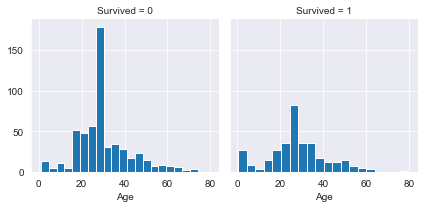

In [319]:
x = sns.FacetGrid(df, col='Survived')
x.map(plt.hist, 'Age', bins=20)

In [320]:
df = pd.get_dummies(df)

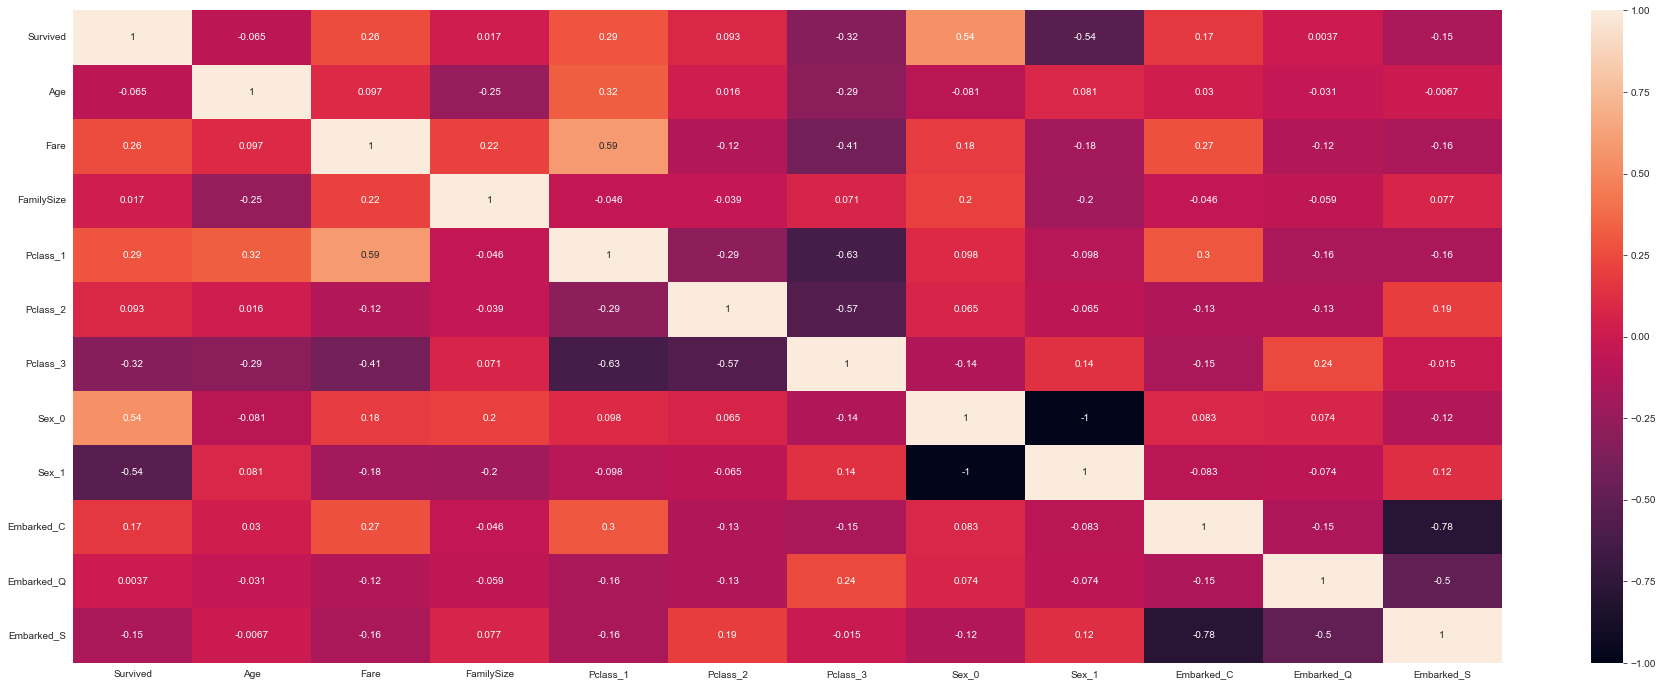

In [328]:
corr = df.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

Most people between mid 20's and early 30's. With some outliers closing in on 80

Text(0, 0.5, 'Age')

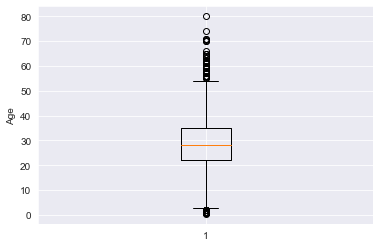

In [322]:
plt.boxplot(df['Age'])
plt.ylabel('Age')

This shows that most people paid little money for their tickets, which fits nicely with 64% of people being on either lower- or mid-class

Text(0, 0.5, 'Fare')

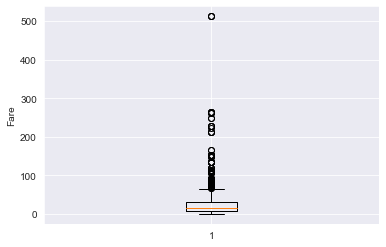

In [323]:
plt.boxplot(df['Fare'])
plt.ylabel('Fare')

# Splitting Data

In [324]:
train = df.sample(frac=0.6)
val_test = df.drop(train.index)
val = val_test.sample(frac=0.5)
test = val_test.drop(val.index)